# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)# YOUR CODE HERE

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. World Happiness Report
2. My model will predict the Life Ladder score, which represents the self-reported well-being of the country's residents on a scale from 0-10.The label is the Life Ladder Score. 
3. This is a supervised regression problem. 
4. I will be using all the features for now except the standard deviation of the life ladder score by country-year and Standard deviation/Mean of ladder by country-year since these are derived from the label. 
5. Predicting a country's happiness score helps governments and organizations understand what factors make people’s lives better, like health, income, social support, or trust in government. This can guide decisions and policies to improve quality of life and overall well-being.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
# Dataset info and stats
print("Shape:", df.shape)

print("\nData types:")
print(df.dtypes)

df.describe(include='all')

Shape: (1562, 19)

Data types:
country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviatio

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
unique,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,NaN,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,NaN,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,NaN,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,NaN,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,NaN,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579


Columns with missing values:
GINI index (World Bank estimate)                            979
gini of household income reported in Gallup, by wp5-year    357
GINI index (World Bank estimate), average 2000-15           176
Democratic Quality                                          171
Delivery Quality                                            171
Confidence in national government                           161
Perceptions of corruption                                    90
Generosity                                                   80
Freedom to make life choices                                 29
Log GDP per capita                                           27
Positive affect                                              18
Social support                                               13
Negative affect                                              12
Healthy life expectancy at birth                              9
dtype: int64


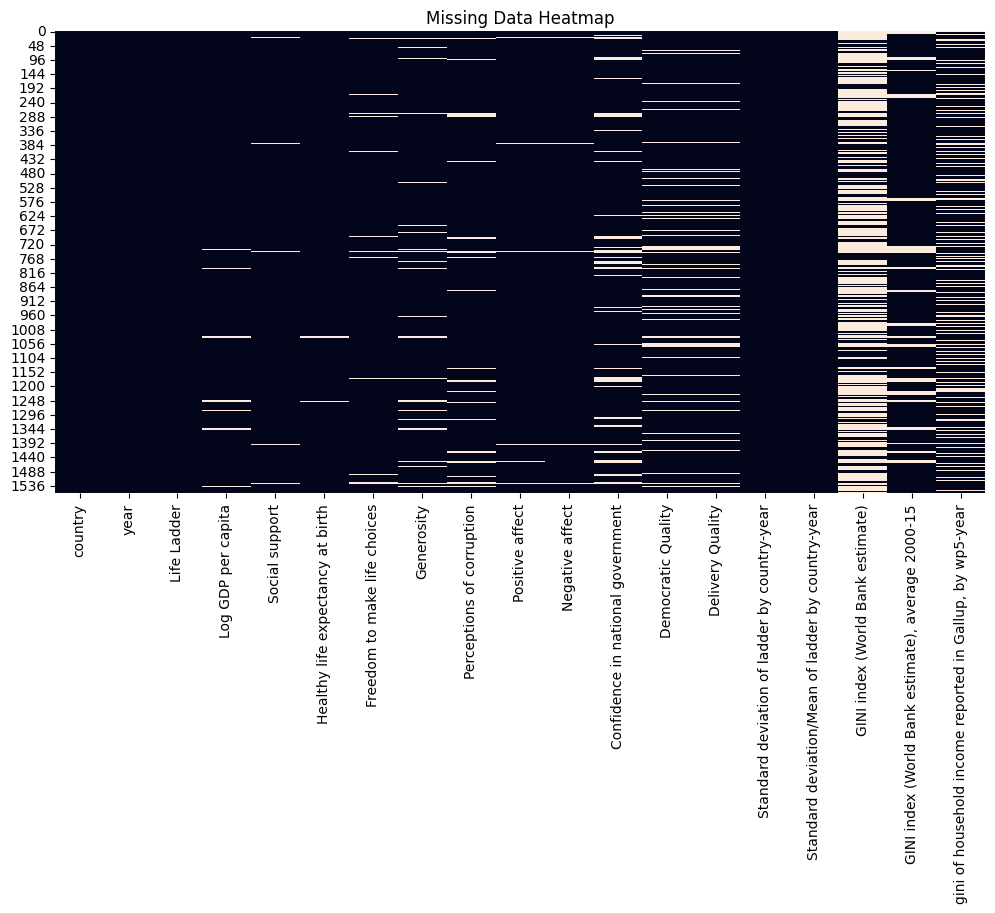

In [4]:
#examine missing data

missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print("Columns with missing values:")
print(missing_counts)

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [5]:
#Feature correlations with label

corr_features = df.drop(columns=['Life Ladder'])
corr_matrix = pd.concat([df['Life Ladder'], corr_features], axis=1).corr()
corrs = corr_matrix['Life Ladder'].sort_values(ascending=False)
top_feature_corrs = corrs.drop('Life Ladder')
print(top_feature_corrs)

#top two correlated features used for pairplot
top_two_corr = corrs.drop(['Life Ladder']).index[:2].tolist()

Log GDP per capita                                          0.779476
Healthy life expectancy at birth                            0.729852
Delivery Quality                                            0.706673
Social support                                              0.700299
Democratic Quality                                          0.607034
Positive affect                                             0.554462
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
year                                                       -0.014505
Confidence in national government                          -0.085543
GINI index (World Bank estimate)                           -0.097255
Standard deviation of ladder by country-year               -0.154257
GINI index (World Bank estimate), average 2000-15          -0.172745
Negative affect                                            -0.267492
gini of household income reported 

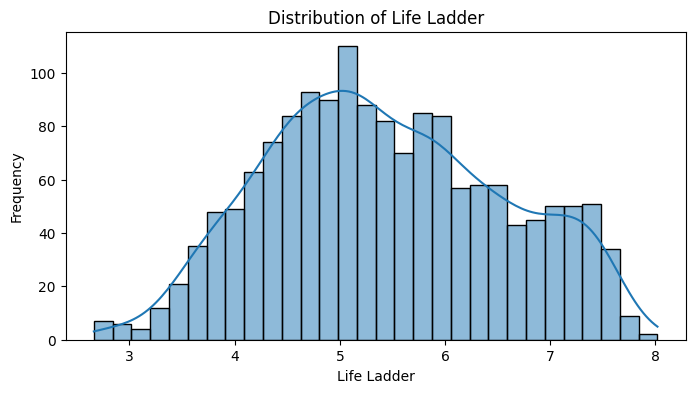

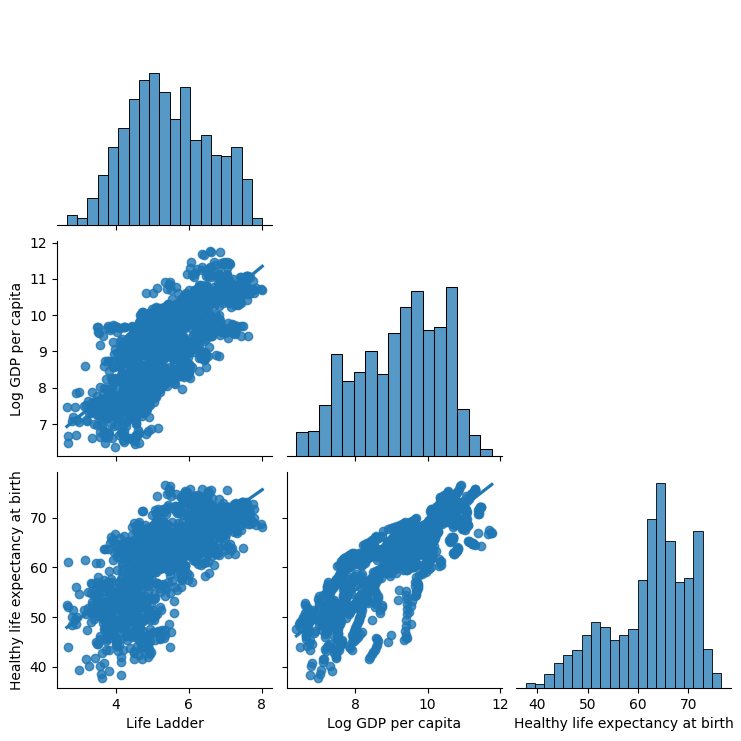

In [6]:
#Visualize Relationships

plt.figure(figsize=(8, 4))
sns.histplot(df['Life Ladder'], kde=True, bins=30)
plt.title('Distribution of Life Ladder')
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')
plt.show()

df_corrs = df[['Life Ladder'] + top_two_corr]
sns.pairplot(df_corrs, kind='reg', corner=True)
plt.show()

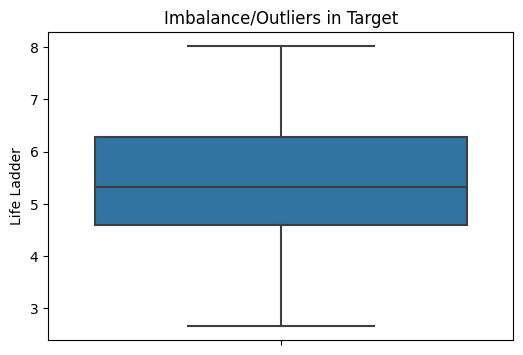

In [7]:
#Visualize Class Imbalance

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Life Ladder'])
plt.title("Imbalance/Outliers in Target")
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After performing exploratory data analysis, I selected a refined list of features for modeling. Based on the correlation matrix, the top features most strongly associated with the Life Ladder score are: Log GDP per capita, Healthy life expectancy at birth, Social support, Delivery Quality, Democratic Quality, Positive affect, and Freedom to make life choices. I decided to remove features such as the GINI indices, Perceptions of corruption, and Confidence in national government due to either a high number of missing values or weak/negative correlation with the target.

The label, Life Ladder, was found to be relatively balanced, with no significant skew or class imbalance, as confirmed by the boxplot. Relationships between selected features and the target were visualized using pairplots, showing clear positive linear trends. These EDA findings guided my decisions about which features to retain and indicated that a regression model would be appropriate for predicting happiness scores.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [9]:
# YOUR CODE HERE
# Drop features that could cause leakage or are irrelevant 
#gini 1 bc 63% missing, wp5 bc 23% missing
df.drop(columns=[
    'country', 'year',
    'Standard deviation of ladder by country-year',
    'Standard deviation/Mean of ladder by country-year',
    'GINI index (World Bank estimate)',
    'gini of household income reported in Gallup, by wp5-year'
], inplace=True)

#define label and features
label = 'Life Ladder'
features = df.columns.drop(label).tolist()

#perform mean imputation for missing values
for col in features:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)

In [10]:
#use winzorisation for outliers

df['label_life_ladder'] = stats.mstats.winsorize(df[label], limits=[0.01, 0.01])

In [11]:
#split features
X = df[features]
y = df['label_life_ladder']

#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)

In [12]:
#Regression models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

#fit and predict all models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results.append({'Model': name,'RMSE': mean_squared_error(y_test, preds, squared=False),'R2': r2_score(y_test, preds)})


print(pd.DataFrame(results))

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in versio

              Model      RMSE        R2
0            Linear  0.544492  0.772647
1             Ridge  0.544479  0.772658
2             Lasso  1.142247 -0.000549
3      DecisionTree  0.545444  0.771851
4      RandomForest  0.396010  0.879737
5  GradientBoosting  0.422383  0.863186


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
#Random Forest and GradientBoosting performed best, so will perform grid search to tune hyperparameters
#RadomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [250, 300, 350],'max_depth': [None]}
rf_grid = GridSearchCV(rf, rf_params,cv=3,scoring='neg_root_mean_squared_error')

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("RF best params:", rf_grid.best_params_)

#GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb_params = {'n_estimators': [150, 200, 250],'learning_rate': [0.125, 0.2, .3],'max_depth': [5, 6, 7]}
gb_grid = GridSearchCV(gb, gb_params,cv=3,scoring='neg_root_mean_squared_error')

gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
print("GB best params:", gb_grid.best_params_)

RF best params: {'max_depth': None, 'n_estimators': 250}
GB best params: {'learning_rate': 0.125, 'max_depth': 5, 'n_estimators': 250}


      Model      RMSE        R2
0   Best RF  0.389906  0.883416
1   Best GB  0.397836  0.878626
2  Stacking  0.384996  0.886334


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


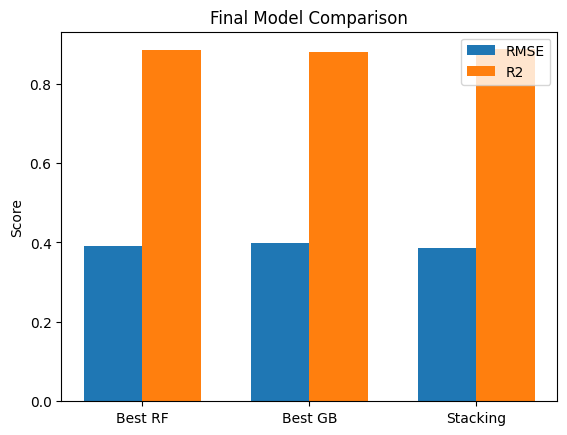

In [14]:
#stacking model
stack = StackingRegressor(estimators=[('rf', best_rf),('gb', best_gb),('dt', DecisionTreeRegressor(random_state=42))], final_estimator=Ridge(), passthrough=False)

stack.fit(X_train, y_train)

#compare results of best three models
final_models = {'Best RF': best_rf,'Best GB': best_gb,'Stacking': stack}

final_results = []
for name, model in final_models.items():
    preds = model.predict(X_test)
    final_results.append({'Model': name,'RMSE': mean_squared_error(y_test, preds, squared=False),'R2': r2_score(y_test, preds)})

final_df = pd.DataFrame(final_results)
print(final_df)

#create bar chart to visualize comparison
x = final_df['Model']
rmse = final_df['RMSE']
r2   = final_df['R2']
ind = range(len(x))
width = 0.35

plt.bar(ind, rmse, width, label='RMSE')
plt.bar([i + width for i in ind], r2, width, label='R2')
plt.xticks([i + width/2 for i in ind], x)
plt.ylabel('Score')
plt.title('Final Model Comparison')
plt.legend()
plt.show()

The stacking ensemble ended up performing the best, with an RMSE of 0.368 and an R² of 0.895. So, it is able to predict a country’s Life Ladder score to within approximately ±0.37 points and explains almost 90% of the variation in those scores. The tuned Random Forest was a close second with RMSE 0.372 and R² 0.893, and Gradient Boosting was also minutely worse with RMSE 0.378 and R² 0.889. This shows that combining Random Forest, Gradient Boosting, and a single decision tree within the stacking model really helps capture the links between things like GDP, health, social support,and freedom to make life choices making it a useful tool for understanding and improving national well-being.